In [1]:
from utils import get_data
import models

import numpy as np
from matplotlib import pyplot as plt

import torch
import torch.nn as nn

In [2]:
train_loader, val_loader = get_data()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
def show_example(data_loader):
    # Show one example image
    idx = np.random.randint(0, len(data_loader.dataset))
    img, label = data_loader.dataset[idx]
    temp_img = np.transpose(img, (1, 2, 0))
    plt.imshow(temp_img, cmap='gray')
    plt.title(f'Label: {label}')
    plt.show()

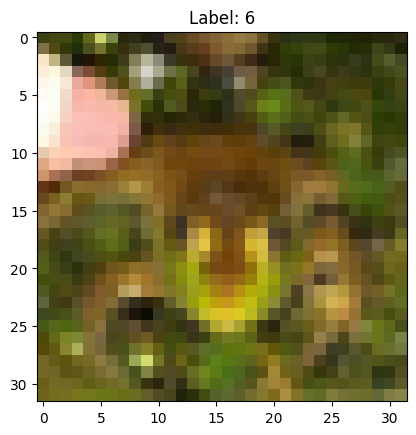

In [4]:
show_example(train_loader)

In [5]:
limit = 1024

train_loader.dataset.data = train_loader.dataset.data[:limit]
train_loader.dataset.targets = train_loader.dataset.targets[:limit]

In [6]:
def train_cycle(model):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    for epoch in range(10):
        for i, (img, label) in enumerate(train_loader):
            optimizer.zero_grad()
            output = model(img)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()

            if i % 10 == 0:
                print(f'Epoch: {epoch}, Step: {i}, Loss: {loss.item()}')

        val_loss = 0
        val_acc = 0
        for i, (img, label) in enumerate(val_loader):
            output = model(img)
            loss = criterion(output, label)
            val_loss += loss.item()
            val_acc += (output.argmax(1) == label).sum().item()

        print(f'Epoch: {epoch}, Val Loss: {val_loss / len(val_loader)}, Val Acc: {val_acc / len(val_loader.dataset)}')

In [8]:
baseline_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=False)
model = models.PackedResnet18(num_estimators=4, alpha=2, gamma=2)

train_cycle(model)

Using cache found in /home/tomas/.cache/torch/hub/pytorch_vision_v0.10.0
/home/tomas/.virtualenvs/snek/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/tomas/.virtualenvs/snek/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 0, Step: 0, Loss: 3.7758243083953857
Epoch: 0, Step: 10, Loss: 2.1390132904052734
Epoch: 0, Val Loss: 1.9185822685812688, Val Acc: 0.2864
Epoch: 1, Step: 0, Loss: 1.6584622859954834
Epoch: 1, Step: 10, Loss: 1.7533602714538574
Epoch: 1, Val Loss: 1.7331108105410435, Val Acc: 0.3552
Epoch: 2, Step: 0, Loss: 1.6588349342346191
Epoch: 2, Step: 10, Loss: 1.4432440996170044


KeyboardInterrupt: 